![title](header.png)

Hypothesis testing is the most basic form of analyical statistics. It works by us giving a <i>null hypothesis</i>, say, the mean of a population being equal to 50, then using samples from the same population we can test whether our null hypothesis is true or not. Hypothesis testing is easy to do with Python using the scipy library - and the statsmodels library can give us some additional functionality when needed. By the end of this guide you should be comfortable using Python to perform simple hypothesis test and be able to apply it to real world problems.

## Student's T-Test

Student's T-Test can tell us if two means are equal, or if a mean is equal to a particular value. Below we have the data for IQ scores for 50 people, and we want to test, using the sample, if the mean of the general population is equal to 100.

In [10]:
scores = [117,137,105,120,44,94,89,61,92,123,130,119,79,119,95,95,108,92,110,121,85,65,84,100,83,74,80,127,106,88,145,86,123,107,91,77,72,138,92,50,102,96,109,97,141,82,94,115,101,91]

For a preliminary look at our data, we can quickly graph it as a histogram using matplotlib:

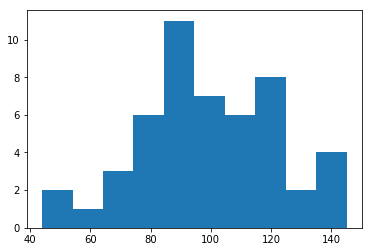

In [6]:
import matplotlib.pyplot as plt

plt.hist(scores)
plt.show()

The student t-test assumes our data is normally distributed - meaning the data has a bell shape to it. While we can see our data above isn't perfect, it's good enough to continue.

We want to test if the mean IQ of the population is 100 using this sample. The function we want is <i>ttest_1samp()</i> in the scipy.stats module. Let's run this and see what we get:

In [8]:
import scipy.stats as stats #can also be written as "from scipy import stats"

print(stats.ttest_1samp(scores,100))

Ttest_1sampResult(statistic=-0.30763272152834936, pvalue=0.75966563634430628)


What does this output mean? The statistic is a helpful number to have because it's the number we compare to the distribution (in this case, the t-49 distribution) to make our conclusions. The pvalue is what we're interested in. It's the probability that <i>given the null hypothesis (the mean being 100), our sample gives us the result it does.</i> How do we convert this to a definitive yes/no result? We need to use significance levels. Significance levels are thresholds at which we reject or accept our null hypothesis depending on the p-value. If the p-value is above our significance level, we cannot reject our null hypothesis - but if it is lower, we can. Typically we use a significance value of 5%, but larger or smaller significance levels can be used. Remember - the smaller the significane level, the stronger evidence we have to reject our null hypothesis if the p-value is lower than it.

In our case, a p-value of 75.9% is well above 5%, so there is <i>no reason</i> to reject our null hypothesis of the population mean being equal to 100.

To show you what happens when the null hypothesis is false, let's look at what happens when we test for the null hypothesis being equal to 150:

In [13]:
print(stats.ttest_1samp(scores,150))

Ttest_1sampResult(statistic=-16.003179738280803, pvalue=4.2848532726844928e-21)


Our p-value is now 4.28 e-21 - that's very, very small. In other words, there is <i>very strong evidence (p-value < 1%)</i> that the population mean for IQ is <i>not</i> 150, as we'd expect.

We've looked at a one-sample t-test, testing if one sample is equal to a mean we choose ourselves - but what if we want to test if two samples are equal? For this we need to use an <i>independent 2-sample t-test</i>. This test assumes the variances of the two sets are roughly equal - we can test this later. Below we have the same data, but split into genders:

In [23]:
scores = [117,137,105,120,44,94,89,61,92,123,130,119,79,119,95,95,108,92,110,121,85,65,84,100,83,74,80,127,106,88,145,86,123,107,91,77,72,138,92,50,102,96,109,97,141,82,94,115,101,91]
men = scores[:22] #The data was sorted so the first 21 entries were men.
women = scores[22:] #So from the 22nd onwards we have the women.
print(men)
print(women)

[117, 137, 105, 120, 44, 94, 89, 61, 92, 123, 130, 119, 79, 119, 95, 95, 108, 92, 110, 121, 85, 65]
[84, 100, 83, 74, 80, 127, 106, 88, 145, 86, 123, 107, 91, 77, 72, 138, 92, 50, 102, 96, 109, 97, 141, 82, 94, 115, 101, 91]


Testing if the means are equal is easy, using the <i>ttest_ind()</i> function. Here the null hypothesis is that the two means are equal.

In [24]:
print(stats.ttest_ind(men,women))

Ttest_indResult(statistic=0.27009541129591547, pvalue=0.78824475119470483)


Again, we have a p-value of 79%, meaning there is no evidence to reject the null hypothesis. Therefore from this test we can conclude that men and women have the same average IQ.

There's a special case of two sampled t-test where the data is paired - for example, if we give 25 people a drug and measure their heart rate before and 15mins after taking the drug, we have 25 data points for each sample. For each data point in the control set we have a corresponding data point in the other set from the same person, so our data is paired. We also don't need for both sets of data to be normally distributed - it's enough for just the difference to be. If these condition are met, we can use a more powerful version of the independent 2 sample t-test; the 2 sample paired t-test. Below we have the data for the experiment above:

In [36]:
control = [70, 80, 86, 92, 84, 69, 73, 101, 78, 72, 74, 83, 80, 73, 84, 85, 80, 85, 74, 84, 79, 83, 86, 76, 77]
fifteen = [89, 99, 105, 111, 103, 87, 92, 119, 96, 91, 93, 102, 98, 92, 103, 104, 98, 104, 92, 103, 97, 102, 105, 95, 96]

For this situation we use the <i>ttest_rel()</i> function - the null hypothesis here is that the means are equal:

In [37]:
stats.ttest_rel(control,fifteen)

Ttest_relResult(statistic=-204.25194526088882, pvalue=2.1036620058407739e-40)

Our p-value is 2.1 e-40, which strongly suggests that the means are <i>not</i> equal.

The paired t-test is more powerful than the independent t-test, meaning that it will pick up on smaller differences between the two means.

## Testing For Equal Variance

If we have two samples we want to test for equal variance, either for a direct test or to check we are okay to use one of the tests above, we have a couple of options:

* F-test (extremely dependent on normality, which isn't very helpful for us)
* Bartlett's Test
* Levene's Test (better than Barlett's test for data which is not normally distributed)

Scipy has functions for Bartlett's Test and Levene's test, which are <i>bartlett()</i> and <i>levene</i> respectively. For both of these, the null hypothesis is that the variances are equal. Let's test to see if the variances are equal for our IQs split by gender is the same:

In [39]:
print(stats.bartlett(men,women))
print(stats.levene(men,women))

BartlettResult(statistic=0.11379496878318175, pvalue=0.73586430378344914)
LeveneResult(statistic=0.37710466803928877, pvalue=0.54205660176957238)


Both tests show us that there is no reason to assume the variances aren't equal. The tests we did earlier are valid!

## Testing For Normality

Some of our tests require that our data is normally distributed. For this we can use D’Agostino and Pearson's test by using the <i>normaltest()</i> function. Let's test if our IQs were normally distributed:

In [43]:
print(stats.normaltest(scores))

NormaltestResult(statistic=0.10212051194763901, pvalue=0.95022141229082702)


Looks like they are! Most tests are <i>robust</i> against non-normality, meaning that even if the data isn't normally distributed, the test will still work - however, it's always worth testing to see how worried we should be - if our p-value came back below 0.01, it might be a good idea to use a different, non-parametric test.

## Mini Project

Below we have two runners, Angela and Bill, and 50 training times for an upcoming race. Using statistical tests, test to see if;

* The two means are the same.
* The two variances are the same.
* The data is normally distributed.

In [58]:
angela = [141, 151, 151, 154, 150, 143, 153, 149, 156, 144, 158, 147, 145, 149, 159, 154, 150, 154, 145, 151, 160, 151, 149, 158, 139, 165, 149, 157, 153, 154, 144, 148, 147, 153, 144, 151, 143, 153, 151, 142, 144, 147, 142, 149, 147, 154, 150, 138, 150, 148]
bill = [103, 109, 93, 95, 107, 96, 102, 99, 105, 101, 99, 107, 102, 95, 98, 112, 95, 110, 103, 107, 100, 95, 92, 101, 103, 95, 97, 102, 99, 108, 98, 100, 100, 97, 101, 92, 101, 108, 102, 93, 101, 99, 105, 100, 101, 100, 92, 92, 92, 90]